In [278]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import datetime
from sklearn.linear_model import LinearRegression

In [166]:
'''This is just where I brought in data from an excel spreadsheet.'''
hourlydata = pd.read_excel('fuelbyhour.xlsx')

In [167]:
'''Remove the year as its always the same'''
hourlydata = hourlydata.drop(['DeliveryYear'],axis=1)

In [168]:
'''Fills in the hour for the types as it read as NaN.'''
for j in range(len(hourlydata)-1):
    if math.isnan(hourlydata.iloc[j+1,1]) == True:
        hourlydata.iloc[j+1,1] = hourlydata.iloc[j,1]

,Day,Hour,Fuel,Output
0,2018-01-01,1.0,NUCLEAR,11671
1,NaN,1.0,GAS,1583
2,NaN,1.0,HYDRO,4152
3,NaN,1.0,WIND,992
4,NaN,1.0,SOLAR,0
5,NaN,1.0,BIOFUEL,3
6,NaN,2.0,NUCLEAR,11672
7,NaN,2.0,GAS,1192
8,NaN,2.0,HYDRO,4093
9,NaN,2.0,WIND,1124


In [169]:
'''Fills in the date on the entries.'''
Na = hourlydata['Day'].isna()
for j in range(len(hourlydata)-1):
    if Na[j+1] == True:
        hourlydata.iloc[j+1,0] = hourlydata.iloc[j,0]

In [170]:
'''Gets our date into the right data type'''
hourlydata['Day'] = pd.to_datetime(hourlydata['Day'])

'''Converts from integer to float because python wants that for some reason.'''
for i in range(len(hourlydata)):
    hourlydata.iloc[i,2] = float(hourlydata.iloc[i,2])

In [172]:
'''Puts the data together nicely as "newframe" '''
#newframe = (workingframe.groupby(['Day','Hour','Fuel'])['Output'].mean())

'Puts the data together nicely as "newframe" '

In [173]:
'''Sends the structure to a pickle for use in other scripts'''
#newframe.to_pickle('EnergyOutput')

'Sends the structure to a pickle for use in other scripts'

In [174]:
#Output = pd.read_pickle('EnergyOutput')

In [201]:
#hourlydata = hourlydata.set_index('Day')
Nuclear = hourlydata.where(hourlydata['Fuel']=='NUCLEAR').dropna()
Nuclear = Nuclear.reset_index()
Nuclear = Nuclear.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Nuclear'})

Gas = hourlydata.where(hourlydata['Fuel']=='GAS').dropna()
Gas = Gas.reset_index()
Gas = Gas.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Gas'})

Hydro = hourlydata.where(hourlydata['Fuel']=='HYDRO').dropna()
Hydro = Hydro.reset_index()
Hydro = Hydro.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Hydro'})

Wind = hourlydata.where(hourlydata['Fuel']=='WIND').dropna()
Wind = Wind.reset_index()
Wind = Wind.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Wind'})

Solar = hourlydata.where(hourlydata['Fuel']=='SOLAR').dropna()
Solar = Solar.reset_index()
Solar = Solar.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Solar'})

Biofuel = hourlydata.where(hourlydata['Fuel']=='BIOFUEL').dropna()
Biofuel = Biofuel.reset_index()
Biofuel = Biofuel.set_index(['Day','Hour']).drop(['Fuel'],axis=1).rename(columns={'Output':'Biofuel'})

Fuel = Nuclear.join(Gas)
Fuel = Fuel.join(Hydro)
Fuel = Fuel.join(Wind)
Fuel = Fuel.join(Solar)
Fuel = Fuel.join(Biofuel)
Fuel['Production'] = Fuel['Nuclear']+Fuel['Gas']+Fuel['Hydro']+Fuel['Wind']+Fuel['Solar']+Fuel['Biofuel']

In [179]:
'''Loads in and reformats the price data to be merged with the production data.'''
Price = pd.read_csv('price.csv')
Price = Price[['Date','Hour','HOEP']].rename(columns={'Date':'Day'})
Price['Day'] = pd.to_datetime(Price['Day'])
Price['Hour'] = pd.to_numeric(Price['Hour'])
Price = Price.set_index(['Day','Hour'])

In [203]:
Fuel = Fuel.join(Price)

In [183]:
'''Exports this dataframe as a pickle hell yeah gamers B)'''
#Fuel.to_pickle('MoreFuelMoreProblems')

In [195]:
'''Loads in a csv with Power demand and **Dab** formats it for merging with the mega dataframe'''
Demand = pd.read_csv('2018Demand.csv')
Demand['Day'] = pd.to_datetime(Demand['Date'])
Demand['Ontario'] = pd.to_numeric(Demand['Ontario Demand'])
Demand['Market'] = pd.to_numeric(Demand['Market Demand'])
Demand['Hour'] = pd.to_numeric(Demand['Hour'])
Demand = Demand.drop(['Date','Ontario Demand','Market Demand'],axis=1)
Demand = Demand.set_index(['Day','Hour'])

In [204]:
MasterFrame = Fuel.join(Demand)

In [205]:
MasterFrame.to_pickle('One_frame_to_rule_them_all')

In [279]:
MasterFrame = pd.read_pickle('One_frame_to_rule_them_all')

In [218]:
difference = pd.Series(MasterFrame['Market']-MasterFrame['Ontario'])

In [220]:
difference.mean()

2077.0807077625573

In [5]:
MasterFrame

Nuclear     Gas   Hydro    Wind  Solar  Biofuel  Production  \
Day        Hour                                                                
2018-01-01 1.0   11671.0  1583.0  4152.0   992.0    0.0      3.0     18401.0   
           2.0   11672.0  1192.0  4093.0  1124.0    0.0      1.0     18082.0   
           3.0   11672.0  1040.0  4231.0  1265.0    0.0      0.0     18208.0   
           4.0   11669.0  1041.0  3895.0  1369.0    0.0      0.0     17974.0   
           5.0   11674.0  1004.0  3271.0  1848.0    0.0      0.0     17797.0   
           6.0   11682.0  1048.0  3292.0  2022.0    0.0      0.0     18044.0   
           7.0   11682.0   966.0  3977.0  2378.0    0.0      1.0     19004.0   
           8.0   11682.0   741.0  4311.0  2542.0    0.0      4.0     19280.0   
           9.0   11678.0   650.0  4058.0  2719.0    2.0      2.0     19109.0   
           10.0  11682.0   556.0  4644.0  2687.0   13.0      2.0     19584.0   
           11.0  11679.0   636.0  4171.0  2805.0   36.0      3.0     19330.0   
           12.0  11688.0   847.0  3819.0  2806.0   47.0      3.0     19210.0   
           13.0  11682.0  1059.0  3790.0  2859.0   62.0      2.0     19454.0   
           14.0  11681.0  1288.0  3592.0  2655.0   65.0      1.0     19282.0   
           15.0  11681.0  1623.0  3703.0  2267.0   49.0      0.0     19323.0   
           16.0  11680.0  2031.0  3802.0  2681.0   25.0      0.0     20219.0   
           17.0  11669.0  2280.0  4779.0  2772.0    5.0      0.0     21505.0   
           18.0  11668.0  2690.0  5670.0  2721.0    0.0      0.0     22749.0   
           19.0  11678.0  2582.0  5170.0  2921.0    0.0      0.0     22351.0   
           20.0  11677.0  2490.0  5073.0  2974.0    0.0      0.0     22214.0   
           21.0  11679.0  2315.0  5162.0  2855.0    0.0      0.0     22011.0   
           22.0  11674.0  1767.0  4946.0  2658.0    0.0      0.0     21045.0   
           23.0  11674.0  1017.0  4158.0  2572.0    0.0      0.0     19421.0   
           24.0  11679.0   937.0  3809.0  2722.0    0.0      5.0     19152.0   
2018-01-02 1.0   11663.0   948.0  3564.0  2871.0    0.0     12.0     19058.0   
           2.0   11663.0   621.0  3164.0  2538.0    0.0     16.0     18002.0   
           3.0   11660.0   551.0  3161.0  2646.0    0.0     14.0     18032.0   
           4.0   11657.0   607.0  3153.0  2284.0    0.0     13.0     17714.0   
           5.0   11658.0   859.0  3051.0  2646.0    0.0      4.0     18218.0   
           6.0   11663.0  1113.0  3276.0  2858.0    0.0      2.0     18912.0   
...                  ...     ...     ...     ...    ...      ...         ...   
2018-12-30 19.0  10823.0   369.0  4959.0  1959.0    0.0      0.0     18110.0   
           20.0  10821.0   393.0  4804.0  2177.0    0.0      0.0     18195.0   
           21.0  10827.0   398.0  4814.0  2115.0    0.0      0.0     18154.0   
           22.0  10824.0   398.0  4744.0  1961.0    0.0      0.0     17927.0   
           23.0  10819.0   287.0  4649.0  1697.0    0.0      0.0     17452.0   
           24.0  10826.0   231.0  4398.0  1314.0    0.0      0.0     16769.0   
2018-12-31 1.0   10822.0   246.0  3805.0  1256.0    0.0      4.0     16133.0   
           2.0   10816.0   233.0  3516.0  1287.0    0.0     10.0     15862.0   
           3.0   10813.0   231.0  3326.0  1041.0    0.0      9.0     15420.0   
           4.0   10819.0   229.0  3686.0   692.0    0.0     10.0     15436.0   
           5.0   10972.0   238.0  3852.0   561.0    0.0     11.0     15634.0   
           6.0   11168.0   230.0  3513.0   511.0    0.0     14.0     15436.0   
           7.0   11192.0   231.0  3690.0   707.0    0.0     22.0     15842.0   
           8.0   11191.0   232.0  4143.0   944.0    0.0     27.0     16537.0   
           9.0   11197.0   232.0  4465.0  1287.0    4.0     27.0     17212.0   
           10.0  11194.0   230.0  4666.0  1471.0   19.0     27.0     17607.0   
           11.0  11196.0   230.0  4798.0  1508.0   31.0     27.0     17790.0   
           12.0  

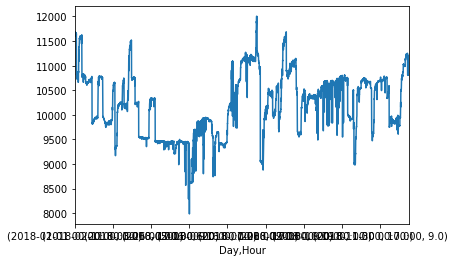

In [8]:
MasterFrame['Nuclear'].plot()

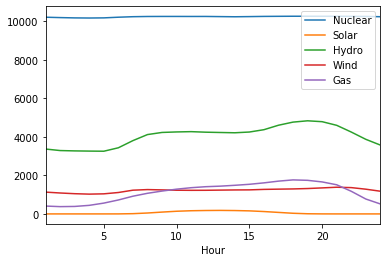

In [280]:
hourmeans = MasterFrame.groupby(['Hour']).mean()
hourmeans[['Nuclear','Solar','Hydro','Wind','Gas']].plot()
#hourmeans['Hydro'].plot()

In [3]:
MasterFrame.describe()

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,10232.749772,1128.146347,4047.396804,1222.796461,59.043151,36.682763,16726.815297,22.444435,15689.103425,17766.184132
std,638.200251,1124.005622,766.470377,936.995985,90.579479,50.455115,1830.242634,22.131897,2318.553939,2133.476285
min,7986.000000,72.000000,2355.000000,2.000000,0.000000,0.000000,12385.000000,-4.390000,10541.000000,13074.000000
25%,9707.250000,285.000000,3427.000000,432.000000,0.000000,1.000000,15376.000000,6.000000,13964.000000,16194.000000
50%,10290.000000,702.000000,4035.000000,958.000000,1.000000,25.000000,16580.500000,17.045000,15564.500000,17586.000000
75%,10712.000000,1613.000000,4641.250000,1872.250000,95.000000,32.000000,17908.000000,34.362500,17236.000000,19137.000000
max,12005.000000,5589.000000,6091.000000,4028.000000,336.000000,479.000000,23692.000000,365.640000,23240.000000,24490.000000


In [70]:
countframe = pd.merge(MasterFrame.reset_index(),hourmeans,left_on=['Hour'],right_on=['Hour'])

In [71]:
#countframe['SolarMore'] = pd.Series(np.ones((8760)))
#countframe['SolarLess'] = pd.Series(np.ones((8760)))
countframe = countframe.set_index(['Day','Hour'])
#countframe['SolarMore'] = countframe['SolarMore'].where((countframe['Solar_x'] > countframe['Solar_y']),0)
#countframe['SolarLess'] = countframe['SolarLess'].where(countframe['Solar_x'] < countframe['Solar_y'])
#countframe

In [3]:
countframe['DNuclear'] = abs(countframe['Nuclear_x'] - countframe['Nuclear_y'])
countframe['DSolar'] = abs(countframe['Solar_x'] - countframe['Solar_y'])
countframe['DWind'] = abs(countframe['Wind_x'] - countframe['Wind_y'])
countframe['DGas'] = abs(countframe['Gas_x'] - countframe['Gas_y'])
countframe['DHydro'] = abs(countframe['Hydro_x'] - countframe['Hydro_y'])
countframe['DBiofuel'] = abs(countframe['Biofuel_x'] - countframe['Biofuel_y'])
countframe['DProduction'] = abs(countframe['Production_x'] - countframe['Production_y'])
DeltaProductions = countframe[['DNuclear','DSolar','DWind','DHydro','DGas','DBiofuel','DProduction']]

NameError: name 'countframe' is not defined

In [282]:
P = LinearRegression()
P = P.fit(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))
P.coef_
#P.score(MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).reset_index(drop=True), MasterFrame['HOEP'].reset_index(drop=True))

array([ 0.00032193,  0.00974736,  0.00789546, -0.00129893, -0.02063196,
        0.00509855])

In [5]:
MasterFrame.drop(['HOEP','Production','Ontario','Market'],axis=1).dtypes

Nuclear    float64
Gas        float64
Hydro      float64
Wind       float64
Solar      float64
Biofuel    float64
dtype: object

In [9]:
MasterFrame.describe()

,Nuclear,Gas,Hydro,Wind,Solar,Biofuel,Production,HOEP,Ontario,Market
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,10232.749772,1128.146347,4047.396804,1222.796461,59.043151,36.682763,16726.815297,22.444435,15689.103425,17766.184132
std,638.200251,1124.005622,766.470377,936.995985,90.579479,50.455115,1830.242634,22.131897,2318.553939,2133.476285
min,7986.000000,72.000000,2355.000000,2.000000,0.000000,0.000000,12385.000000,-4.390000,10541.000000,13074.000000
25%,9707.250000,285.000000,3427.000000,432.000000,0.000000,1.000000,15376.000000,6.000000,13964.000000,16194.000000
50%,10290.000000,702.000000,4035.000000,958.000000,1.000000,25.000000,16580.500000,17.045000,15564.500000,17586.000000
75%,10712.000000,1613.000000,4641.250000,1872.250000,95.000000,32.000000,17908.000000,34.362500,17236.000000,19137.000000
max,12005.000000,5589.000000,6091.000000,4028.000000,336.000000,479.000000,23692.000000,365.640000,23240.000000,24490.000000


In [352]:
#this function takes in an array of mean value data and an int defining the length of the simulation, and then computes
#a random walk of the length of the integer. 
def meanwalk(series,integer):
    value = np.zeros(integer)
    std = float(series.std())
    value[0] = max(series.iloc[0] + std*(2*np.random.random_sample()-1),0)
    for i in range(integer-1):
        h = (i+1)%24
        delta = (series.iloc[h] - value[i])/std
        if delta > 0:
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=delta*std+.1),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=delta*std+.1),0)
        else:
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.normal(loc=0,scale=-delta*std+.1),0)
            else:
                value[i+1] = max(value[i] + np.random.normal(loc=delta*std/2,scale=-delta*std+.1),0)   
    return value

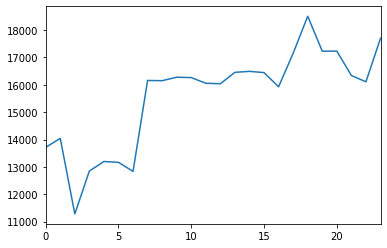

In [376]:
randomsolar = meanwalk(hourmeans['Ontario'],24)
pd.Series(randomsolar).plot()

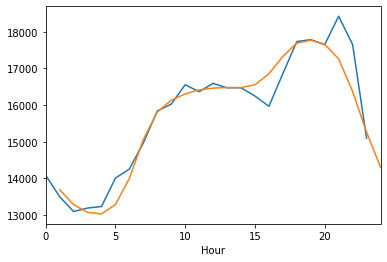

In [388]:
mean = np.array(randomsolar)
for i in range(7):
    mean = (mean+meanwalk(hourmeans['Ontario'],24))/(2)
pd.Series(mean).plot()
hourmeans['Ontario'].plot()

In [378]:
def meanwalk2(series,integer):
    value = np.zeros(integer)
    std = float(series.std())
    value[0] = max(series.iloc[0] + std*(np.random.random_sample()-1),0)
    for i in range(integer-1):
        h = (i+1)%24
        delta = (series.iloc[h] - value[i])/std
        if delta > 0:
            if np.random.random_sample() > delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform(abs(delta*std/2)-abs(np.sqrt(2)*delta*std),abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        else:
            if np.random.random_sample() > -delta:
                value[i+1] = max(value[i] + np.random.uniform(-abs(np.sqrt(2)*delta*std),value[i]+abs(np.sqrt(2)*delta*std)),0)
            else:
                value[i+1] = max(value[i] + np.random.uniform((-abs(delta*std/2))-abs(np.sqrt(2)*delta*std),-abs(delta*std/2)+abs(np.sqrt(2)*delta*std)),0)
        
    return value